# Customer Clustering Analysis

## 1. Import libraries & read/sanitize data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Drop the unnecessary column

In [15]:
df = df.drop(['CustomerID'], axis=1)

## 2. Examine data

### In order to make an effective customer analysis, We must examine the data first 

112

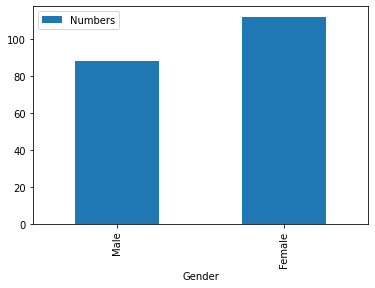

In [24]:
no_of_male = len(df.Gender[(df.Gender=='Male')])
no_of_female = len(df.Gender[(df.Gender=='Female')])
gender_df = pd.DataFrame({'Gender':['Male', 'Female'], 'Numbers':[no_of_male, no_of_female]})
gender_df.plot.bar(x='Gender', y='Numbers')
no_of_female

### The dataset has 200 rows, where the annual income is within range (15-137 k) with a mean of 60k, the annual income is within range (18-70 years old) with a mean of 39 yr and  the spending score is within range (1-99) with a mean of 50. Of the 200 customers, 88 are male & 112 are female

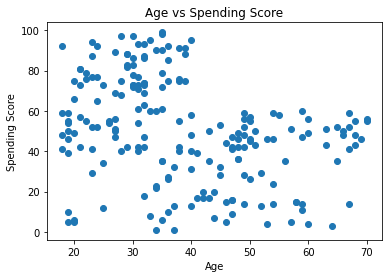

In [28]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

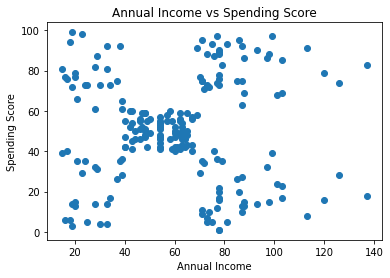

In [29]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [32]:
gender_df = df.groupby(['Gender']).mean()
gender_df

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### The dataset seems to be lacking a direct correlation between x values (Annual income, Age) and the response variable (Spending score). It also seems that the difference between the mean spending score for male & female customers is rather small (51 for Females and 48 for Males). We can divide the data into cluster to understand the relation between the input variables (Age, Annual income, Gender) and the response variable (Spending Score)

## 3. Find the appropriate K

### We will find the appropriate K for clustering Age & Annual Income vs Spending Score using the elbow method

In [39]:
# Import necessary library for normalizing the data
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [38]:
# k = range for elbow graph
k = range(1,10)
# create StandardScaler() for normalizing data
ss = StandardScaler()
age_df = pd.DataFrame(df, columns=['Age','Spending Score (1-100)'])
ss.fit(age_df)
age_df = ss.transform(age_df)
income_df = pd.DataFrame(df, columns=['Annual Income (k$)','Spending Score (1-100)'])
ss.fit(income_df)
income_df = ss.transform(income_df)

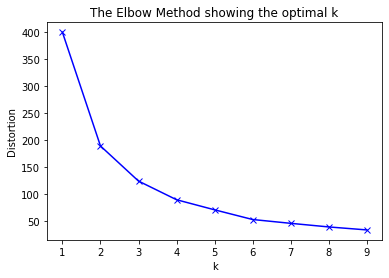

In [41]:
elbow = []
for i in k:
    kmm = KMeans(n_clusters=i)
    kmm.fit(age_df)
    elbow.append(kmm.inertia_)
# Plot the elbow
plt.plot(k, elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

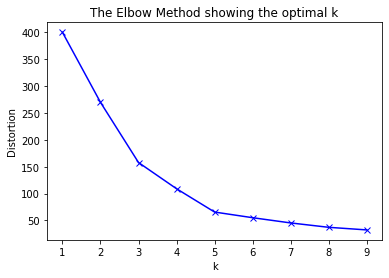

In [42]:
elbow2 = []
for i in k:
    kmm = KMeans(n_clusters=i)
    kmm.fit(income_df)
    elbow2.append(kmm.inertia_)
# Plot the elbow
plt.plot(k, elbow2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Based off of our results, our optimal k when clustering Age vs Spending_Score is k=4 &  our optimal k when clustering Annual_Income vs Spending_Score is k=5, we can now use k-means clustering to draw conclusions

## 4. K-means Clustering

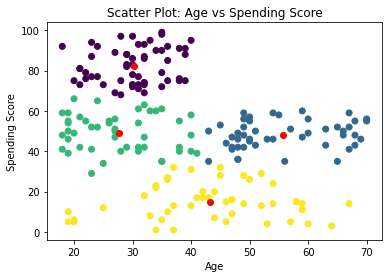

In [58]:
X = pd.DataFrame(df, columns=['Age','Spending Score (1-100)'])
# Select k as 4, as predicted by the elbow graph
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X)
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=kmeans.labels_)
# Plot the center of each cluster in red, cluster_centers is a 2d array of X & Y coordinates of each center
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='red')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter Plot: Age vs Spending Score')
plt.show()

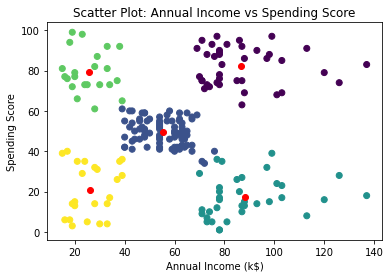

In [59]:
X2 = pd.DataFrame(df, columns=['Annual Income (k$)','Spending Score (1-100)'])
kmeans = KMeans(n_clusters = 5)
kmeans.fit_predict(X2)
plt.scatter(X2['Annual Income (k$)'], X2['Spending Score (1-100)'], c=kmeans.labels_)
# Plot the center of each cluster in red, cluster_centers is a 2d array of X & Y coordinates of each center
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Scatter Plot: Annual Income vs Spending Score')
plt.show()

## 5. Conclusion

### We were able to plot 2 scatter plots with clusters, one for age vs spending score & the other for annual income vs spending score. We can use these clusters to draw conclusions about factors that determine a customer's potential spending score. 

### From the first scatter plot, we can notice that the top left cluster spans the age range (20-40) and the highest spending score range of any other cluster (65-100). This could indicate that customers of the age group (20-40) are more likely to have a higher spending score.

### From the second scatter plot, we can recognize that there is a cluster in the center of the graph with an approximate annual income range of (40-65k) and a spending score range of (40-60). This indicates that customers of annual income within the range (40-65k) are more likely to have a spending score within range (40-60). As indicated by the other clusters, customers of annual income within the lower range (15-40k) can either have a spending score within the lower range of spending scores (0-40) or within the upper range (60-100). The same conclusion can be made about customers of annual income withing the upper range (70-140k)